In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fruits= pd.read_table('fruits.txt')
print(fruits.head())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


In [2]:
print(fruits.shape)

(59, 7)


In [3]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [4]:
print(fruits.groupby('fruit_subtype').size())

fruit_subtype
braeburn             5
cripps_pink          6
golden_delicious     5
granny_smith         3
mandarin             5
selected_seconds     6
spanish_belsan       6
spanish_jumbo        3
turkey_navel        10
unknown             10
dtype: int64


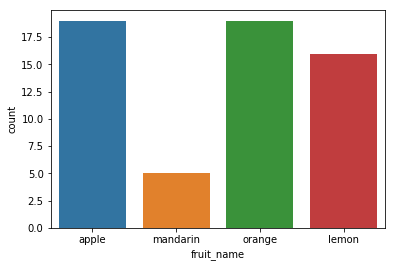

In [5]:
import seaborn as sb
sb.countplot(fruits['fruit_name'],label='Count')
plt.show()

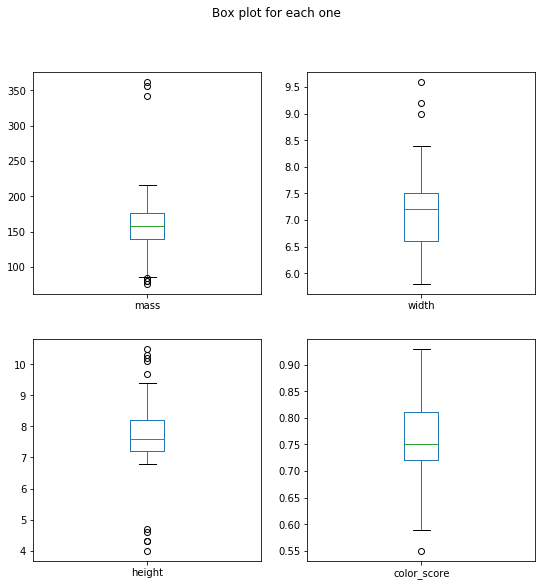

In [6]:
fruits.drop('fruit_label',axis=1).plot(kind='box',subplots=True,layout=(2,2),sharex=False, sharey=False, figsize=(9,9),title='Box plot for each one')
plt.show()

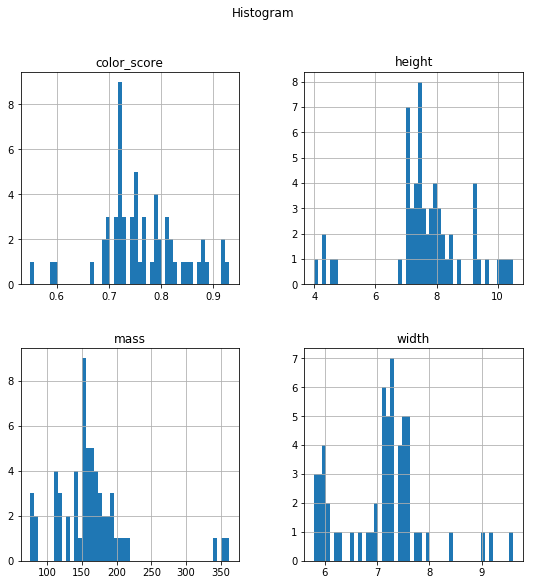

In [7]:
import pylab as pl
fruits.drop('fruit_label',axis=1).hist(bins=50, figsize=(9,9))
pl.suptitle('Histogram')
plt.show()

In [8]:
#train test and split
feature_names = ['mass','width','height','color_score']
X=fruits[feature_names]
y=fruits['fruit_label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
gamma='auto'

In [10]:
#code preprocessing to bring values in same range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,y_train)
print('Train case accuracy is {:.2f}'.format(model.score(X_train,y_train)))
print('Test case accuracy is {:.2f}'.format(model.score(X_test,y_test)))
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Train case accuracy is 0.70
Test case accuracy is 0.40
[[3 0 0 1]
 [1 0 0 0]
 [5 0 1 2]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.33      0.75      0.46         4
           2       0.00      0.00      0.00         1
           3       1.00      0.12      0.22         8
           4       0.40      1.00      0.57         2

    accuracy                           0.40        15
   macro avg       0.43      0.47      0.31        15
weighted avg       0.68      0.40      0.32        15



C:\Users\vaibh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vaibh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vaibh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vaibh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vaibh\Anaconda3\lib\site-packages\sklearn\me

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model= DecisionTreeClassifier()
model.fit(X_train,y_train)
print('Train case accuracy is {:.2f}'.format(model.score(X_train,y_train)))
print('Test case accuracy is {:.2f}'.format(model.score(X_test,y_test)))
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Train case accuracy is 1.00
Test case accuracy is 0.60
[[4 0 0 0]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]
              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         1
           3       0.75      0.38      0.50         8
           4       0.33      0.50      0.40         2

    accuracy                           0.60        15
   macro avg       0.66      0.72      0.66        15
weighted avg       0.66      0.60      0.58        15



In [14]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(X_train,y_train)
print('Train case accuracy is {:.2f}'.format(model.score(X_train,y_train)))
print('Test case accuracy is {:.2f}'.format(model.score(X_test,y_test)))
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))                                                        

SyntaxError: invalid syntax (<ipython-input-14-2dd5ce9e20b0>, line 7)

In [15]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
print('Train case accuracy is {:.2f}'.format(model.score(X_train,y_train)))
print('Test case accuracy is {:.2f}'.format(model.score(X_test,y_test)))
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Train case accuracy is 0.86
Test case accuracy is 0.47
[[4 0 0 0]
 [0 1 0 0]
 [2 0 2 4]
 [0 0 2 0]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       0.50      0.25      0.33         8
           4       0.00      0.00      0.00         2

    accuracy                           0.47        15
   macro avg       0.54      0.56      0.53        15
weighted avg       0.51      0.47      0.46        15



In [16]:
#SVM(SUPPORT VECTOR MACHINES)
from sklearn.svm import SVC
model= SVC()
model.fit(X_train,y_train)
print('Train case accuracy is {:.2f}'.format(model.score(X_train,y_train)))
print('Test case accuracy is {:.2f}'.format(model.score(X_test,y_test)))
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Train case accuracy is 0.61
Test case accuracy is 0.40
[[4 0 0 0]
 [1 0 0 0]
 [7 0 0 1]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.67      1.00      0.80         2

    accuracy                           0.40        15
   macro avg       0.25      0.50      0.33        15
weighted avg       0.18      0.40      0.24        15



C:\Users\vaibh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vaibh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vaibh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vaibh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted